## Donors Choose Resources
This notebook explores the data from DonorsChoose.Org Applicaton Screening database. It contains all the proposals and resources that teachers have asked for. Given the historical data of whether proposals were accepted or not, the goal is to predict if future proposals will be accepted. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
import calendar
import nltk
from textblob import TextBlob

In [2]:
# load data
train_df = pd.read_csv('~/.kaggle/competitions/donorschoose-application-screening/train.csv')
test_df = pd.read_csv('~/.kaggle/competitions/donorschoose-application-screening/test.csv')
resources_df = pd.read_csv('~/.kaggle/competitions/donorschoose-application-screening/resources.csv')

/Users/thejason/env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_df.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


In [4]:
train_df.describe(include='all')

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
count,182080,182080,182076,182080,182080,182080,182080,182080,182080,182080,182080,6374,6374,182080,182080.000000,182080.000000
unique,182080,104414,5,51,180439,4,51,407,164282,147689,180984,6359,6336,179730,NaN,NaN
top,p204448,fa2f220b537e8653fb48878ebb38044d,Mrs.,CA,2016-09-01 00:00:03,Grades PreK-2,Literacy & Language,Literacy,Flexible Seating,As a teacher in a low-income/high poverty scho...,Students will be using Chromebooks to increase...,"Daily, students will check out their chrome bo...","Having taught engineering in college, I have c...",My students need electronic tablets to do all ...,NaN,NaN
freq,1,74,95405,25695,30,73890,39257,15775,377,46,24,2,3,84,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.237055,0.847682
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.016086,0.359330
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,1.000000


In [5]:
resources_df = pd.read_csv('~/.kaggle/competitions/donorschoose-application-screening/resources.csv')

In [6]:
resources_df.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


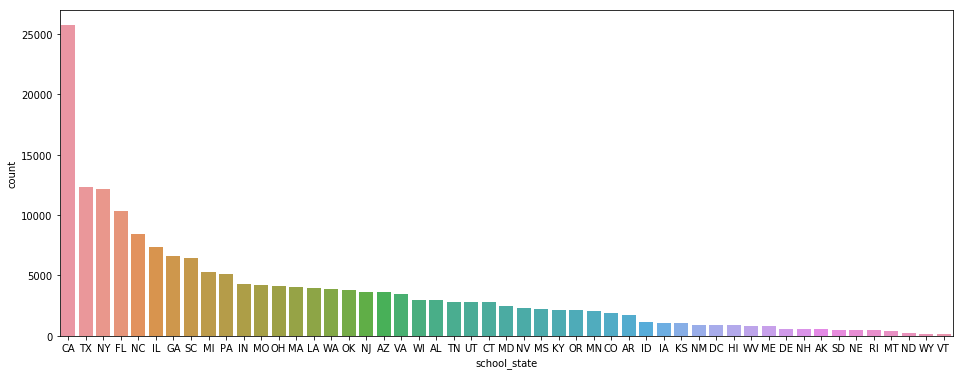

In [7]:
f, ax = plt.subplots(figsize=(16, 6))
sns.countplot(x='school_state',data=train_df,order=train_df['school_state'].value_counts().index)

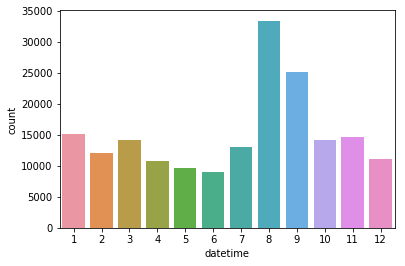

In [8]:
train_df['datetime'] = pd.to_datetime(train_df['project_submitted_datetime'])
train_df['datetime'].dt.month.value_counts()
sns.countplot(x=train_df['datetime'].dt.month,data=train_df)

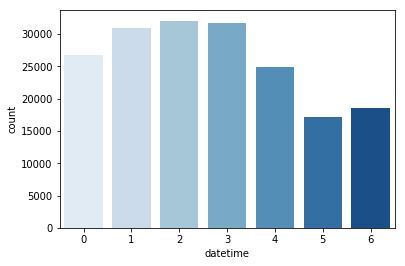

In [9]:
sns.countplot(x=train_df['datetime'].dt.dayofweek,data=train_df,palette='Blues')

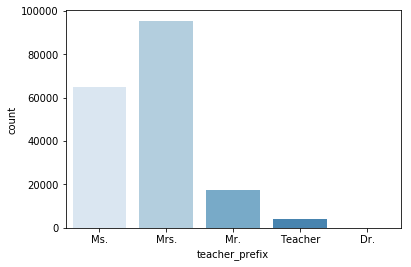

In [10]:
sns.countplot(x=train_df['teacher_prefix'],data=train_df,palette='Blues')

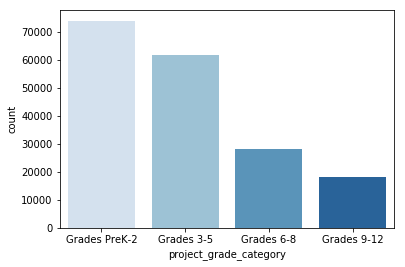

In [11]:
sns.countplot(x=train_df['project_grade_category'],data=train_df,palette='Blues')

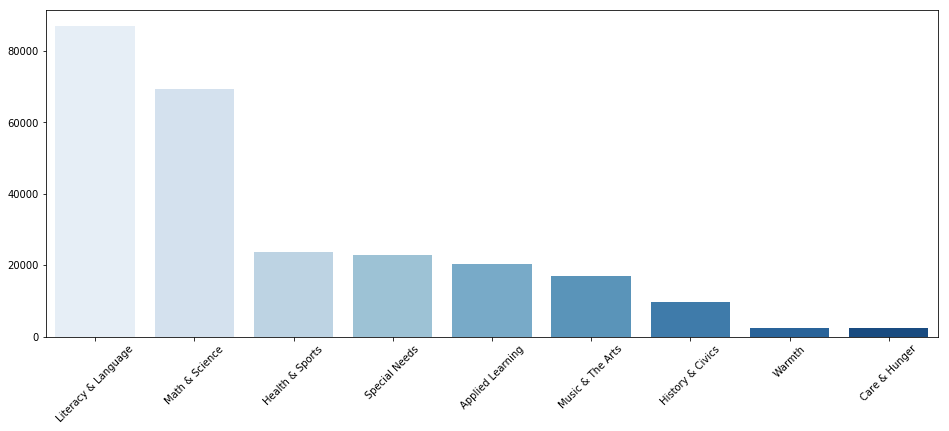

In [12]:
sub_cat = train_df['project_subject_categories'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
f, ax = plt.subplots(figsize=(16, 6))
sns.barplot(sub_cat.index, sub_cat.values, palette='Blues')
plt.xticks(rotation=45)
plt.show()

In [13]:
a = train_df['project_title'][0]
print(a)
nltk.download('punkt')
tokens = nltk.word_tokenize(a)

Super Sight Word Centers
[nltk_data] Downloading package punkt to /Users/thejason/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/thejason/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Super', 'NNP'), ('Sight', 'NNP'), ('Word', 'NNP'), ('Centers', 'NNPS')]

In [21]:
sentiment = TextBlob(a)
print(sentiment.sentiment.polarity)

0.3333333333333333


In [25]:
approved_df = train_df[train_df['project_is_approved']==1]
denied_df = train_df[train_df['project_is_approved']==0]
denied_df.describe()

,teacher_number_of_previously_posted_projects,project_is_approved
count,27734.000000,27734.0
mean,6.902791,0.0
std,17.684081,0.0
min,0.000000,0.0
25%,0.000000,0.0
50%,2.000000,0.0
75%,6.000000,0.0
max,379.000000,0.0


In [39]:
a = pd.crosstab(train_df.teacher_prefix, train_df.project_is_approved, dropna=False, normalize='index')

In [42]:
print(train_df.teacher_prefix.value_counts(dropna=False))
train_df['teacher_prefix'].fillna('Mrs.', inplace=True)

In [43]:
print(train_df.teacher_prefix.value_counts(dropna=False))

Mrs.       95409
Ms.        65066
Mr.        17667
Teacher     3912
Dr.           26
Name: teacher_prefix, dtype: int64


In [52]:
a = train_df.groupby('school_state').agg({'project_is_approved': ['mean', 'count']}).reset_index().sort_values([('project_is_approved', 'mean')], ascending=False).reset_index(drop=True)
print(a)

   school_state project_is_approved       
                               mean  count
0            DE            0.891341    589
1            WY            0.875706    177
2            OH            0.871467   4139
3            CT            0.871294   2766
4            WA            0.868050   3903
5            WV            0.867700    839
6            NH            0.867121    587
7            ND            0.866935    248
8            SC            0.864923   6463
9            SD            0.862348    494
10           MA            0.860138   4054
11           ME            0.858525    827
12           KY            0.857735   2172
13           MO            0.857547   4247
14           MN            0.857421   2055
15           NV            0.856770   2297
16           CA            0.856431  25695
17           OR            0.855592   2119
18           VA            0.855194   3446
19           IL            0.853792   7332
20           NY            0.853582  12157
21         

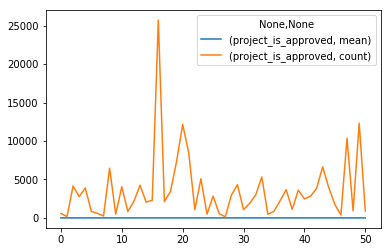

In [58]:
a.plot()

In [64]:
train_df.groupby('school_state')